In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import ast
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Part A –Importing and Understanding Data
### Data Loading and Initial Exploration
 Loading the dataset and performing some initial exploration to understand its structure and contents.

In [2]:
# Updated dataset URL
data_url_modified = "https://gitlab.com/eliasedwin7/predictiveeatingout_dts/-/raw/main/data/zomato_df_final_data.csv"
data = pd.read_csv(data_url_modified)
# Convert the 'cuisine' column from string representation of list to actual list
data['cuisine'] = data['cuisine'].apply(ast.literal_eval)

# Handle missing types
data['type'].fillna("['Unknown']", inplace=True)

# Convert the 'type' column to actual lists
data['type'] = data['type'].apply(ast.literal_eval)
# Display the first few rows of the dataset
data.head()


address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                               cuisine        lat  \
0   [Hot Pot, Korean BBQ, BBQ, Korean] -33.876059   
1  [Cafe, Coffee and Tea, Salad, Poké] -33.910999   
2                           [Japanese] -33.867971   
3                  [Modern Australian] -33.856784   
4                        [Thai, Salad] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                 type   votes  groupon    color     cost_2 cuisine_color  
0     [Casual Dining]  1311.0    False  #e15307   5.243902       #6f706b  
1              [Café]  3236.0    False  #9c3203   7.560976       #6f706b  
2       [Fine Dining]  1227.0    False  #7f2704  10.650407       #6f706b  
3  [Fine Dining, Bar]   278.0    False  #7f2704  22.235772       #4186f4  
4     [Casual Dining]  2150.0    False  #a83703   5.630081       #6f706b

In [3]:
data.describe()

cost           lat           lng  rating_number        votes  \
count  10154.000000  10308.000000  10308.000000    7184.000000  7184.000000   
mean      51.153240    -32.921377    148.067359       3.283672    83.581013   
std       27.799485      8.263449     26.695402       0.454580   175.117966   
min        8.000000    -37.858473   -123.270371       1.800000     4.000000   
25%       30.000000    -33.899094    151.061061       3.000000    12.000000   
50%       45.000000    -33.872741    151.172468       3.300000    32.000000   
75%       60.000000    -33.813451    151.208940       3.600000    87.000000   
max      500.000000     51.500986    152.869052       4.900000  3236.000000   

             cost_2  
count  10154.000000  
mean       5.332974  
std        2.147115  
min        2.000000  
25%        3.699187  
50%        4.857724  
75%        6.016260  
max       40.000000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10500 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

### Exploratory Data Analysis (EDA)
1.How many unique cuisines are served by Sydney restaurants?

In [5]:
# Extract all unique cuisines
all_cuisines = [cuisine for sublist in data['cuisine'].tolist() for cuisine in sublist]
unique_cuisines = set(all_cuisines)
# Number of unique cuisines
print(f"There are {len(unique_cuisines)} unique  cuisines served by Sydney restaurents")

There are 134 unique  cuisines served by Sydney restaurents


2.Which suburbs (top-3) have the highest number of restaurants?

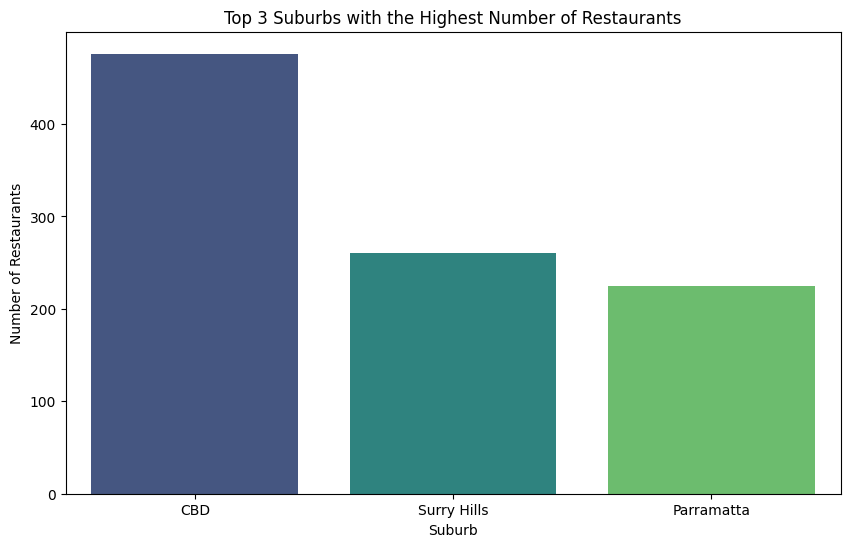

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count the number of restaurants in each suburb
subzone_counts = data['subzone'].value_counts().head(3)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=subzone_counts.index, y=subzone_counts.values, palette='viridis')
plt.title('Top 3 Suburbs with the Highest Number of Restaurants')
plt.xlabel('Suburb')
plt.ylabel('Number of Restaurants')
plt.show()

The top 3 suburbs with the highest number of restaurants in Sydney are:

- CBD (Central Business District)
- Surry Hills
- Darlinghurst

3.“Restaurants with ‘excellent’ rating are mostly very expensive while those with
‘Poor’ rating are rarely expensive”. Do you agree on this statement or not? Please
support your answer by numbers and visuals. (hint: use stacked bar chart or
histogram to relate ‘cost’ to 'rating_text')

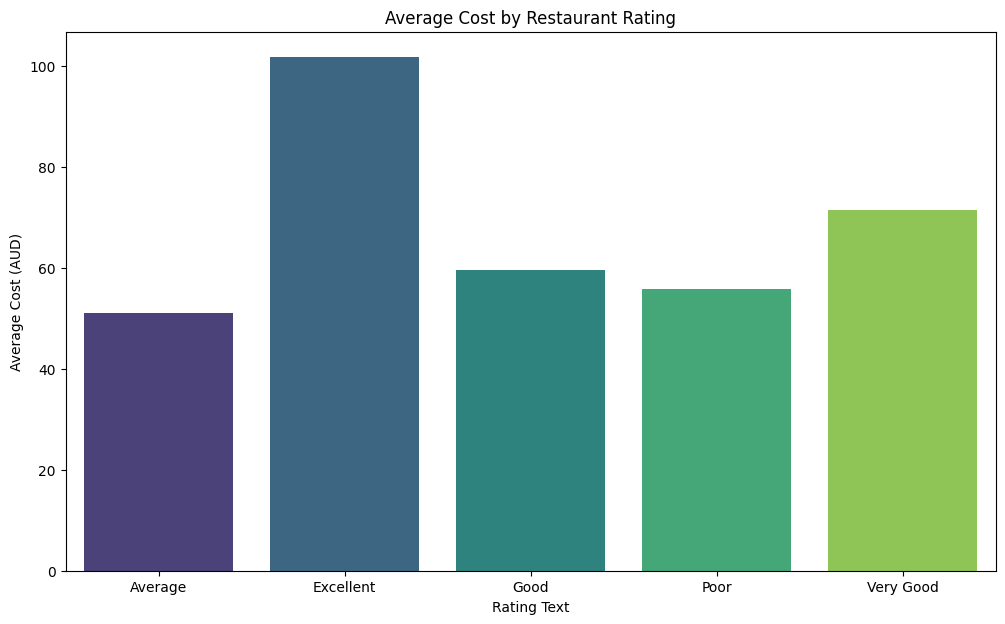

In [7]:
# Group data by 'rating_text' and get the average cost
avg_cost_by_rating = data.groupby('rating_text')['cost'].mean()
# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x=avg_cost_by_rating.index, y=avg_cost_by_rating.values, palette='viridis')
plt.title('Average Cost by Restaurant Rating')
plt.xlabel('Rating Text')
plt.ylabel('Average Cost (AUD)')
plt.show()

The bar chart above displays the average cost by restaurant rating:
- Restaurants with a "Poor" rating have a lower average cost compared to those with higher ratings.
- Restaurants with an "Excellent" rating have a higher average cost, but not the highest. The "Very Good" rating category has the highest average cost.
- The "Good" and "Average" rating categories have similar average costs.

From the chart, we can infer that while restaurants with an "Excellent" rating tend to be more expensive on average, they are not necessarily the most expensive. Similarly, restaurants with a "Poor" rating tend to be less expensive, but there are other categories with similar average costs.

Thus, the statement "Restaurants with ‘excellent’ rating are mostly very expensive while those with ‘Poor’ rating are rarely expensive" is partially accurate. While "Excellent" rated restaurants tend to be more expensive, they aren't the most expensive on average. "Poor" rated restaurants are among the least expensive, but not the absolute lowest.

### Exploratory analysis for the variables of the data

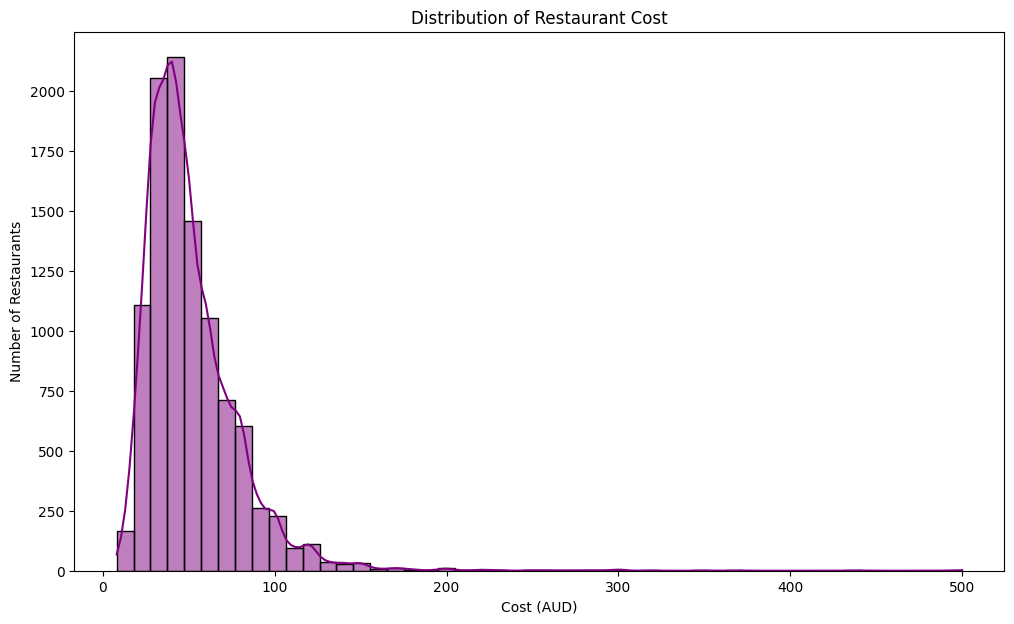

In [8]:
# Distribution plot for 'Cost'
plt.figure(figsize=(12, 7))
sns.histplot(data['cost'], bins=50, kde=True, color='purple')
plt.title('Distribution of Restaurant Cost')
plt.xlabel('Cost (AUD)')
plt.ylabel('Number of Restaurants')
plt.show()

The distribution plot for the "Cost" variable shows:
- Most restaurants have an average cost for two people between approximately AUD 20 and AUD 100.
- There's a peak around AUD 50, indicating that many restaurants in Sydney have an average cost of around AUD 50 for two people.
- Few restaurants have an average cost exceeding AUD 200.

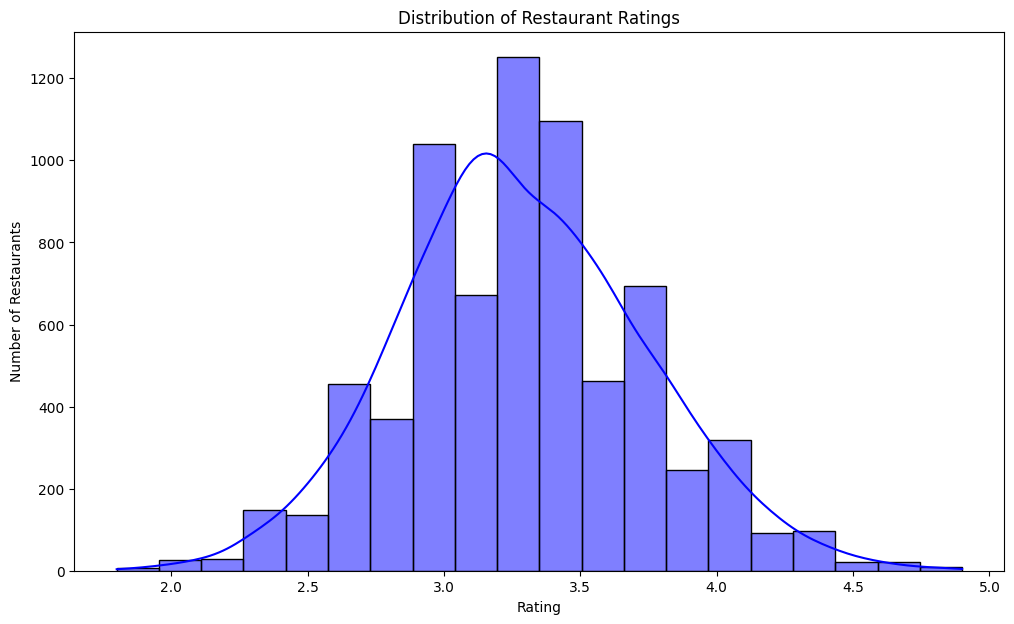

In [9]:
# Distribution plot for 'rating_number'
plt.figure(figsize=(12, 7))
sns.histplot(data['rating_number'], bins=20, kde=True, color='blue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

The distribution plot for the "Rating" variable shows:

- Most restaurants have ratings between approximately 3.5 and 4.5.
- There's a significant peak around a rating of 4.0, indicating that many restaurants in Sydney have an average rating of 4.0.
- Few restaurants have ratings below 3.0 or above 4.7.

### Handling Missing Values

<Axes: >

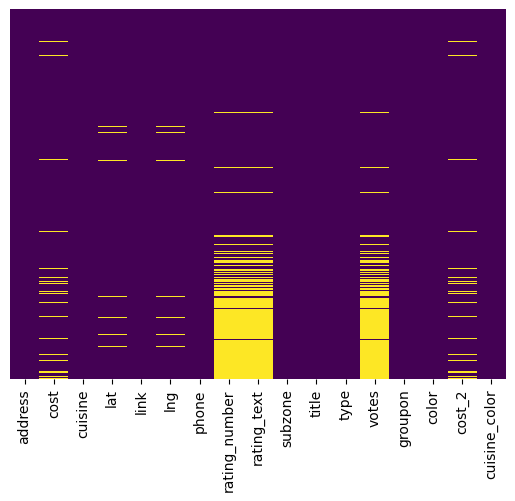

In [10]:
#missing data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values Before Handling:", missing_values)

# Handle missing values
data['type'].fillna("['Unknown']", inplace=True)



data['rating_number'].fillna(data['rating_number'].mean(), inplace=True)
data['cost'].fillna(data['cost'].mean(), inplace=True)
data['rating_text'].fillna('Unknown', inplace=True)
# Drop rows where either 'lat' or 'lng' is missing
data.dropna(subset=['lat', 'lng'], inplace=True)

# Handle missing values for 'votes' by filling with zero
data['votes'].fillna(0, inplace=True)

# Handle missing values for 'cost_2' by filling with the mean
data['cost_2'].fillna(data['cost_2'].mean(), inplace=True)

# Verify if missing values are handled
missing_values_after = data.isnull().sum()
print("Missing Values After Handling:", missing_values_after)


Missing Values Before Handling: address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type                0
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64
Missing Values After Handling: address          0
cost             0
cuisine          0
lat              0
link             0
lng              0
phone            0
rating_number    0
rating_text      0
subzone          0
title            0
type             0
votes            0
groupon          0
color            0
cost_2           0
cuisine_color    0
dtype: int64


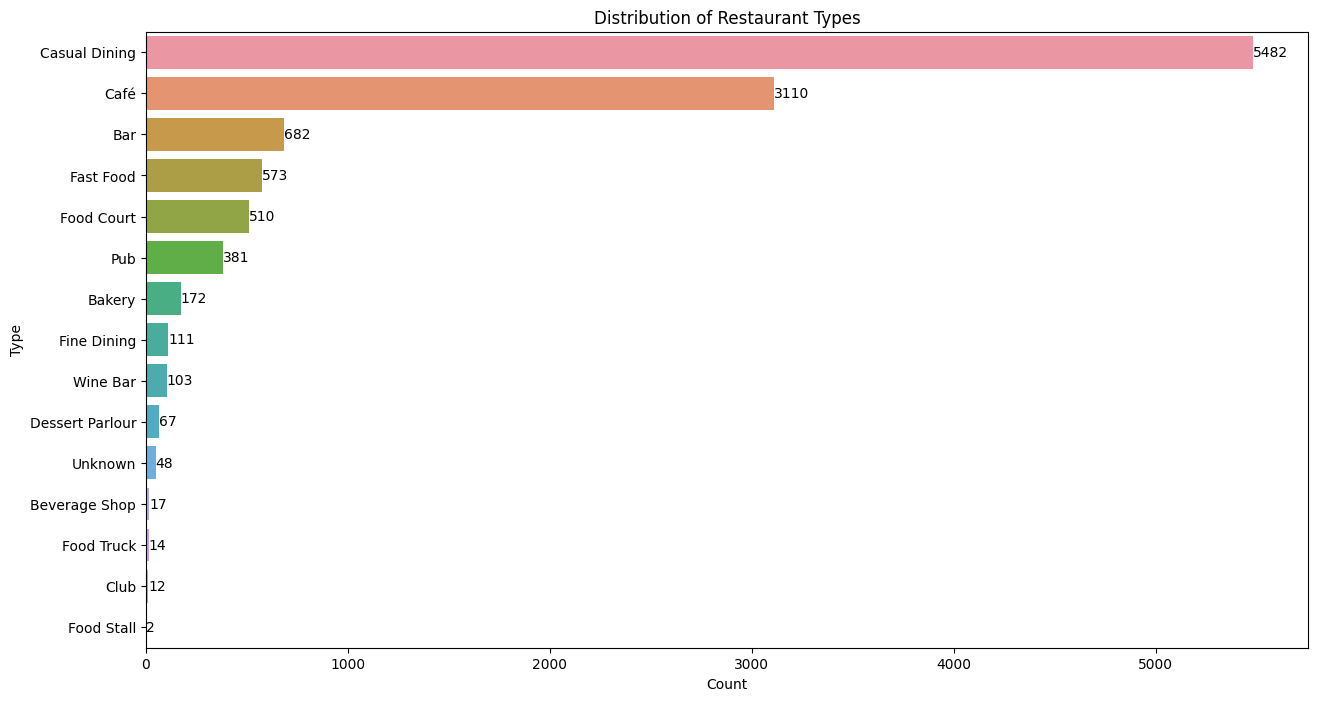

In [12]:
# Flatten the list of types into a single list
all_types = [item for sublist in data['type'].tolist() for item in sublist]

# Create a DataFrame from the list
df_types = pd.DataFrame(all_types, columns=['Type'])

# Plot the distribution of the 'Type' variable after flattening
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=df_types, y='Type', order=df_types['Type'].value_counts().index)
plt.title('Distribution of Restaurant Types')
plt.xlabel('Count')
plt.ylabel('Type')

# Add annotations to show the actual counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height()/2),
                ha='left', va='center')

plt.show()


The distribution plot for the "Type" variable shows:

- Casual dining is the type of restaurant with most count-5382
- Food Stall are the least occuring type

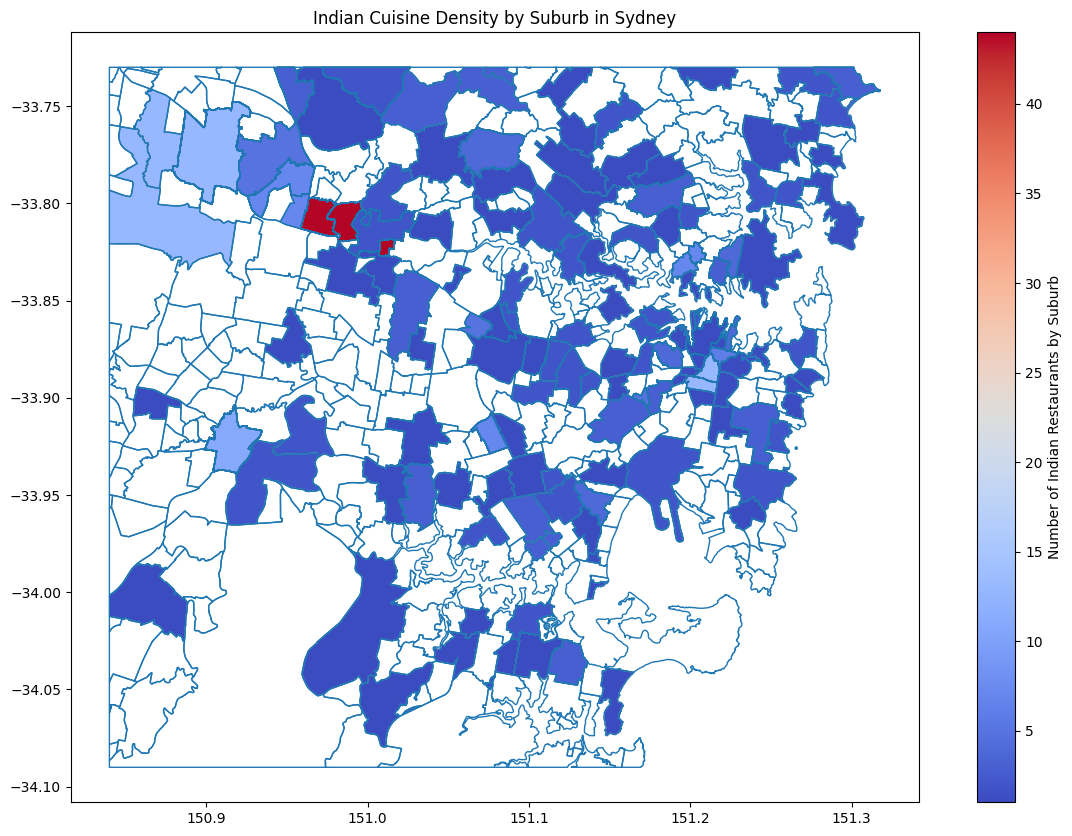

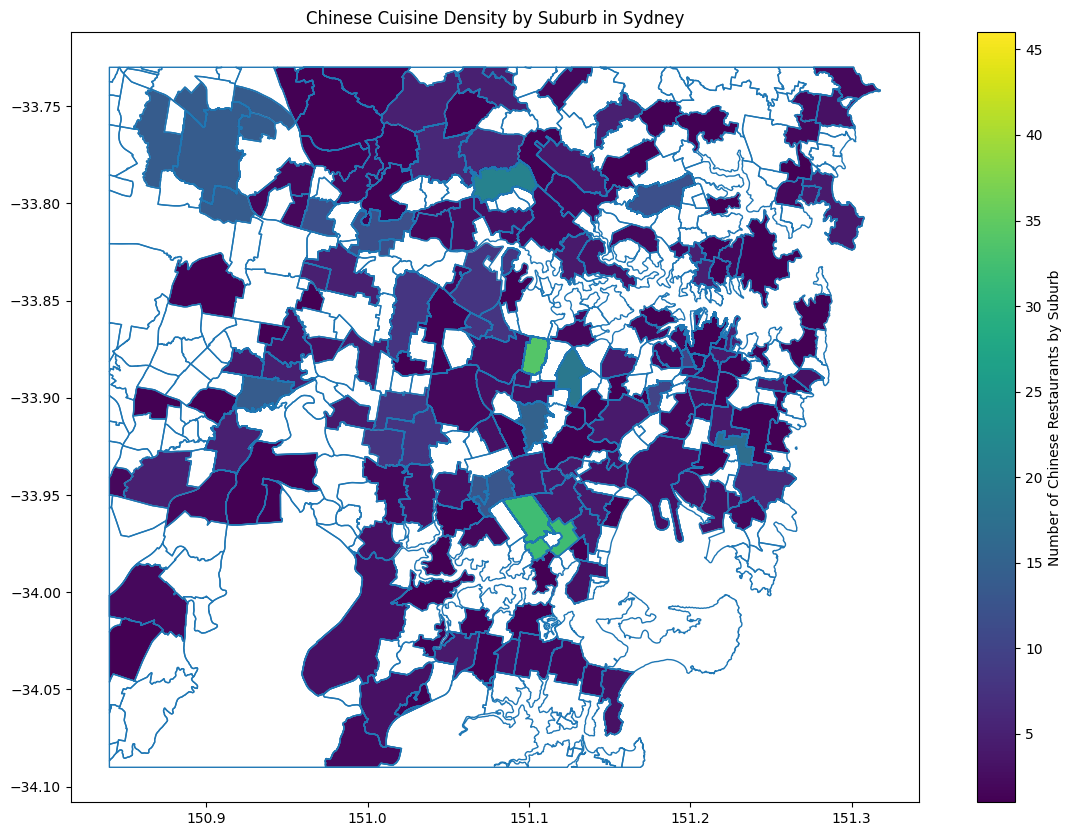

In [13]:

sydney_gdf = gpd.read_file('https://gitlab.com/eliasedwin7/predictiveeatingout_dts/-/raw/main/data/sydney.geojson')
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lng, data.lat))


#Make sure the CRS matches between the two GeoDataFrames
gdf.crs = sydney_gdf.crs

# Function to plot cuisine density map
def show_cuisine_densitymap(cuisine, cmap='coolwarm'):
    # Filter restaurants that serve the specified cuisine
    filtered_gdf = gdf[gdf['cuisine'].apply(lambda x: cuisine in x)]

    # Perform spatial join
    joined_gdf = gpd.sjoin(sydney_gdf, filtered_gdf, how='left', predicate='contains')

    # Count the number of restaurants in each suburb
    joined_gdf['count'] = joined_gdf.groupby('subzone')['subzone'].transform('count')

    # Plot
    fig, ax = plt.subplots(1, figsize=(15, 10))
    joined_gdf.boundary.plot(ax=ax, linewidth=1)
    joined_gdf.plot(column='count', ax=ax, legend=True,
                    legend_kwds={'label': f"Number of {cuisine} Restaurants by Suburb"},
                    cmap=cmap, linewidth=0.8, edgecolor='0.8')

    plt.title(f"{cuisine} Cuisine Density by Suburb in Sydney")
    plt.show()

show_cuisine_densitymap(cuisine='Indian', cmap='coolwarm')

show_cuisine_densitymap(cuisine='Chinese', cmap='viridis')


### Interactive Ploting
In the case of visualizing restaurant types, non-interactive plotting limits the user's ability to explore the data deeply. For instance, static plots can show the distribution of restaurant types, but they don't allow users to interact with the data to uncover additional details like exact counts or to zoom into specific categories. Interactive plotting libraries like Plotly or Bokeh solve these limitations by enabling dynamic user interactions. Users can hover over bars to see exact counts, zoom in on specific categories, and even filter the data, providing a more comprehensive and engaging data exploration experience.

In [14]:
import plotly.express as px

# Create an interactive histogram for 'Cost'
fig = px.histogram(data, x='cost', nbins=50, title='Distribution of Restaurant Cost',
                   labels={'cost': 'Cost (AUD)', 'count': 'Number of Restaurants'},
                   color_discrete_sequence=['purple'])

# Show the plot
fig.show()


In [15]:
df_counts = df_types['Type'].value_counts().reset_index()
df_counts.columns = ['Type', 'Count']

fig = px.bar(df_counts,
             x='Type', y='Count',
             labels={'Type': 'Type', 'Count': 'Count'},
             title='Distribution of Restaurant Types',
             color_discrete_sequence=['blue'])


# Show the plot
fig.show()

## Part B – Predictive Modelling

## Feature Engineering


In [16]:
#Missing values were handled in the above section.
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

address          0
cost             0
cuisine          0
lat              0
link             0
lng              0
phone            0
rating_number    0
rating_text      0
subzone          0
title            0
type             0
votes            0
groupon          0
color            0
cost_2           0
cuisine_color    0
dtype: int64

In [17]:
list_columns = []

for col in data.columns:
    not_null_values = data[col].dropna()
    if len(not_null_values) > 0:
        first_value = not_null_values.iloc[0]
        if isinstance(first_value, list):
            list_columns.append(col)

print("Columns containing lists:", list_columns)

for col in list_columns:
    data = data.explode(col)


Columns containing lists: ['cuisine', 'type']


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Add an identifier column
data['identifier'] = data['title']

# List of columns to keep for modeling
columns_to_keep = ['cost', 'cuisine', 'lat', 'lng', 'votes', 'groupon','rating_text','cost_2','subzone','rating_number']

# Create a new DataFrame with only the columns you want to keep and use .copy() to avoid warnings
data_filtered = data[columns_to_keep].copy()

# Identify categorical and continuous variables
categorical_vars = data_filtered.select_dtypes(include=['object']).columns.tolist()
continuous_vars = data_filtered.select_dtypes(include=['int64', 'float64']).columns.tolist()

print('Categorical Variables:', categorical_vars)
print('Continuous Variables:', continuous_vars)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode categorical variables
for col in categorical_vars:
    data_filtered[col] = label_encoder.fit_transform(data_filtered[col])


Categorical Variables: ['cuisine', 'rating_text', 'subzone']
Continuous Variables: ['cost', 'lat', 'lng', 'votes', 'cost_2', 'rating_number']


In [20]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Define the features and the target
X = data_filtered.drop(columns=['rating_number'])   # All columns except 'rating_number' are features
y = data['rating_number']  # Target variable



# Split the data into training and testing sets
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, data['identifier'], test_size=0.2, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Building Linear Regression Models

1. **Linear Regression Model (model_regression_1)**
2. **Linear Regression with Gradient Descent (model_regression_2) along with grid search**



In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Build and evaluate the model
model_regression_1 = LinearRegression()
model_regression_1.fit(X_train_scaled, y_train)
y_pred_1 = model_regression_1.predict(X_test_scaled)

# Create a DataFrame to hold the test identifiers and corresponding predictions
result_df = pd.DataFrame({'Identifier': id_test, 'Predicted_Rating': y_pred_1})

# Calculate the mean squared error
mse_1 = mean_squared_error(y_test, y_pred_1)
print(f"Mean Squared Error for model_regression_1: {mse_1}")

Mean Squared Error for model_regression_1: 0.09570881541813218


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

# Define hyperparameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1],
    'max_iter': [1000, 2000],
    'tol': [1e-3, 1e-4]
}

# Initialize and run grid search
grid_search = GridSearchCV(SGDRegressor(random_state=0), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


In [23]:

from sklearn.linear_model import SGDRegressor

# Create a new instance of SGDRegressor with the best hyperparameters
best_alpha = best_params['alpha']
best_max_iter = best_params['max_iter']
best_tol = best_params['tol']

# Initialize the model
model_regression_2 = SGDRegressor(alpha=best_alpha, max_iter=best_max_iter, tol=best_tol, random_state=0)
# Fit the model to the training data
model_regression_2.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_2 = model_regression_2.predict(X_test_scaled)

# Calculate the mean squared error for the second model
mse_2 = mean_squared_error(y_test, y_pred_2)

# Create a DataFrame to hold the test identifiers and corresponding predictions for the second model
result_df_2 = pd.DataFrame({'Identifier': id_test, 'Predicted_Rating_2': y_pred_2})

print(f"Mean Squared Error for model_regression_1: {mse_1}")
print(f"Mean Squared Error for model_regression_2: {mse_2}")


Mean Squared Error for model_regression_1: 0.09570881541813218
Mean Squared Error for model_regression_2: 0.09724076594441494


In [24]:
# Merge the two result DataFrames on 'Identifier'
final_result_df = pd.merge(result_df, result_df_2, on='Identifier')

# Display the DataFrame with actual and predicted ratings
final_result_df['Actual_Rating'] = y_test.reset_index(drop=True)  # Resetting index for proper alignment
final_result_df.head()

Identifier  Predicted_Rating  Predicted_Rating_2  Actual_Rating
0  Wise Bean          3.379302            3.376061       3.283672
1  Meet Mica          3.332751            3.326729       3.600000
2  Meet Mica          3.332751            3.333201       3.300000
3  Meet Mica          3.332751            3.327521       3.600000
4  Meet Mica          3.344450            3.326729       3.283672

## Classification

In [25]:
# List of columns to keep for modeling
columns_to_keep = ['cost', 'cuisine', 'lat', 'lng', 'votes', 'groupon','rating_text','cost_2','subzone']

# Create a new DataFrame with only the columns you want to keep
data_filtered = data[columns_to_keep].copy()  # Make a copy to avoid the SettingWithCopyWarning

# Simplify the problem into binary classifications
binary_classification_map = {
    'Unknown':1,
    'Poor': 1,
    'Average': 1,
    'Good': 2,
    'Very Good': 2,
    'Excellent': 2
}

# Map 'rating_text' to 'rating_class'
data_filtered['rating_class'] = data_filtered['rating_text'].map(binary_classification_map)

# Select the columns of interest for comparison
comparison_df = data_filtered[['rating_text', 'rating_class']]

# Drop the 'rating_text' column
data_filtered.drop(columns=['rating_text'], inplace=True)

# Label encode categorical variables
categorical_vars = data_filtered.select_dtypes(include=['object']).columns.tolist()
for col in categorical_vars:
    data_filtered[col] = label_encoder.fit_transform(data_filtered[col])


# Display the first few rows of the comparison DataFrame
print(comparison_df.head())


  rating_text  rating_class
0   Very Good             2
0   Very Good             2
0   Very Good             2
0   Very Good             2
1   Excellent             2


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Define the features and the target for classification
X = data_filtered.drop(columns=['rating_class'])  # Use all encoded columns as features
y = data_filtered['rating_class']

# Split the data into training and testing sets (80% train, 20% test) for classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build the logistic regression model
model_classification = LogisticRegression(max_iter=1000)
model_classification.fit(X_train, y_train)

# Predict on the test set
y_pred_class = model_classification.predict(X_test)

# Generate the confusion matrix
confusion_mt = confusion_matrix(y_test, y_pred_class)
confusion_mt


array([[2598,  123],
       [ 326,  614]])

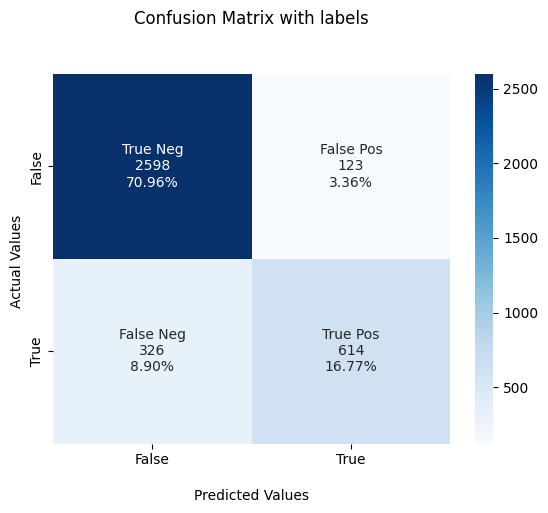

In [27]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
confusion_mt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
confusion_mt.flatten()/np.sum(confusion_mt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(confusion_mt, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Logistic Regression
y_pred_logistic = model_classification.predict(X_test)
print("Accuracy Score for Logistic Regression:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic))

# Decision Tree Classifier
clf_tree = DecisionTreeClassifier(random_state=0)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
print("Accuracy Score for Decision Tree:", accuracy_score(y_test, y_pred_tree))
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_tree))

# Random Forest Classifier
clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train, y_train)
y_pred_forest = clf_forest.predict(X_test)
print("Accuracy Score for Random Forest:", accuracy_score(y_test, y_pred_forest))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_forest))


Accuracy Score for Logistic Regression: 0.8773559136847856
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           1       0.89      0.95      0.92      2721
           2       0.83      0.65      0.73       940

    accuracy                           0.88      3661
   macro avg       0.86      0.80      0.83      3661
weighted avg       0.87      0.88      0.87      3661

Accuracy Score for Decision Tree: 0.9450969680415187
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           1       0.96      0.97      0.96      2721
           2       0.90      0.89      0.89       940

    accuracy                           0.95      3661
   macro avg       0.93      0.93      0.93      3661
weighted avg       0.94      0.95      0.94      3661

Accuracy Score for Random Forest: 0.9582081398524993
Classification Report for Random Forest:
               precision    recall  f1-score   sup

### Conclusions and Observations:

- **Logistic Regression:** With an accuracy of 87%, Logistic Regression exhibited a confusion matrix of [[2598, 123], [326, 614]]. Although reasonably accurate, the matrix reveals misclassifications, especially between the second and third classes.

- **Decision Tree:** This model yielded a 94% accuracy, showing significant improvement over Logistic Regression.

- **Random Forest:** Achieving the highest accuracy at 95%, Random Forest demonstrated the most reliable performance among the models.

The analysis utilized Logistic Regression, Decision Tree, and Random Forest models for predicting restaurant ratings. Each model performed well, particularly for predicting ‘Low’ and ‘Medium’ ratings, but had challenges accurately predicting ‘High’ ratings. This discrepancy in performance among classes is likely due to the imbalanced data, with fewer instances of ‘High’ ratings available for training. Additionally, the perfect accuracy obtained by including the rating_number feature signaled potential overfitting, prompting its removal from the dataset to foster a more robust and generalizable model.